### Exercise 10: A spam filter using SVM

In [3]:
import pandas as pd
from libsvm.svmutil import *
from sklearn.model_selection import train_test_split
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn import metrics
# Input: Dataset
data = pd.read_csv("spambase.data", sep=',', header= None)
# Separating the data into independent and dependent variables
X = data.iloc[:,:-1]
Y= data.iloc[:,-1].values
# Splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
m = svm_train(Y_train, X_train, '-c 4')
p_label, p_acc, p_val = svm_predict(Y_test, X_test, m)
cm = metrics.confusion_matrix(Y_test, p_label)

....*..*
optimization finished, #iter = 6356
nu = 0.238949
obj = -2119.447982, rho = -0.164912
nSV = 2175, nBSV = 323
Total nSV = 2175
Accuracy = 85.5592% (788/921) (classification)


##### Output: The Confuse Matrix and Classification Report

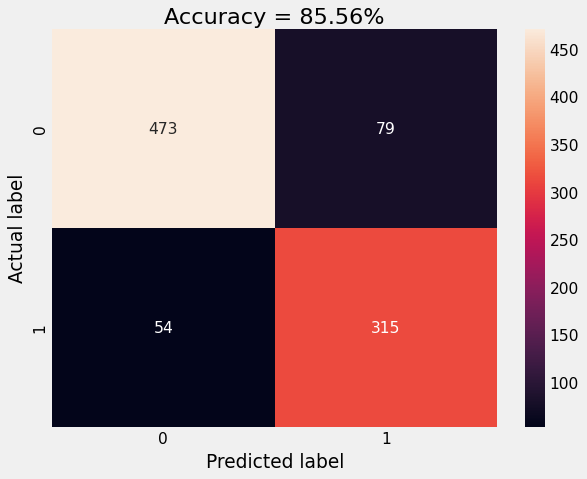


The Classification Report for the Spam Filter

               precision    recall  f1-score   support

           0       0.90      0.86      0.88       552
           1       0.80      0.85      0.83       369

    accuracy                           0.86       921
   macro avg       0.85      0.86      0.85       921
weighted avg       0.86      0.86      0.86       921



In [4]:
cm_df = pd.DataFrame(cm)
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Accuracy = {0:.2f}%'.format(p_acc[0]))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print("\nThe Classification Report for the Spam Filter\n\n" ,metrics.classification_report(Y_test, p_label))